In [3]:
import pandas as pd
import numpy as np
%matplotlib inline 

/Users/nadhir/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv', encoding='utf-8')#reading as text and not object format

In [5]:
type(data.Reviews[0])

unicode

In [6]:
data_str = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [13]:
type(data_str['Brand Name'][0])

str

In [254]:
data.head(3)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0


In [14]:
data.columns = ['Product_name', 'Brand_name', 'Price', 'Rating', 'Reviews', 'Review_votes']

In [15]:
data.columns

Index([u'Product_name', u'Brand_name', u'Price', u'Rating', u'Reviews',
       u'Review_votes'],
      dtype='object')

In [16]:
data.head().T

,0,1,2,3,4
Product_name,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7..."
Brand_name,Samsung,Samsung,Samsung,Samsung,Samsung
Price,199.99,199.99,199.99,199.99,199.99
Rating,5,4,5,4,4
Reviews,I feel so LUCKY to have found this used (phone...,"nice phone, nice up grade from my pantach revu...",Very pleased,It works good but it goes slow sometimes but i...,Great phone to replace my lost phone. The only...
Review_votes,1,0,0,0,0


In [17]:
count = 0
for price in data.Price:
    if(price < 0.0):
        count+=1
print (count)        

0


In [18]:
data.describe()

,Price,Rating,Review_votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [19]:
data.Price = data.Price.fillna(0)
data.Review_votes = data.Review_votes.fillna(0)
data.describe()

,Price,Rating,Review_votes
count,413840.000000,413840.000000,413840.000000
mean,223.614684,3.819578,1.462454
std,272.380590,1.548216,9.030315
min,0.000000,1.000000,0.000000
25%,78.000000,3.000000,0.000000
50%,139.950000,5.000000,0.000000
75%,269.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [20]:
len(data)# we have now a much on the data size

413840

In [21]:
# Categorical feature (not numeric)
categorical_feature = data.select_dtypes(include = ['object']).columns.values
categorical_feature

array(['Product_name', 'Brand_name', 'Reviews'], dtype=object)

In [22]:
#Numerical feature (not categorical)
numerical_feature = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_feature

array(['Price', 'Rating', 'Review_votes'], dtype=object)

In [23]:
#pd.Series(data.Brand_name.value_counts())
print'Number of Brands', len(list(set(data.Brand_name)))

Number of Brands 385


In [24]:
print'Number of Products', len(list(set(data.Product_name)))

Number of Products 4410


# Pivot table

In [25]:
pivot = pd.pivot_table(data, values=['Rating', 'Review_votes'], index=['Brand_name'], columns=[], 
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], margins = True)#.fillna('')

In [26]:
pivot.head(10)

sum                   mean               \
                       Rating Review_votes    Rating Review_votes   
Brand_name                                                          
AKUA                       20            0  5.000000     0.000000   
AMM Global Enterprises     44            1  4.888889     0.111111   
ARGOM TECH                  6            0  3.000000     0.000000   
ASUS                     2165          838  4.482402     1.734990   
ASUS Computers           2896          831  4.027816     1.155772   
AT&T                        5            0  5.000000     0.000000   
ATT                       160           25  3.636364     0.568182   
Acer                       68           27  3.090909     1.227273   
Aeku                       10            8  5.000000     4.000000   
AeroAntenna                 5            0  5.000000     0.000000   

                       count_nonzero                    std               
                              Rating Review_votes    Rating Review_votes  
Brand_name                                                                
AKUA                               4            0  0.000000     0.000000  
AMM Global Enterprises             9            1  0.333333     0.333333  
ARGOM TECH                         2            0  2.828427     0.000000  
ASUS                             483          185  1.070735     4.754574  
ASUS Computers                   719          228  1.386085     6.634777  
AT&T                               1            0       NaN          NaN  
ATT                               44           17  1.792632     0.974028  
Acer                              22           14  1.715728     1.377777  
Aeku                               2            1  0.000000     5.656854  
AeroAntenna                        1            0       NaN          NaN

In [27]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [28]:
ts_rating = pd.Series(data.Rating, index = data.index)

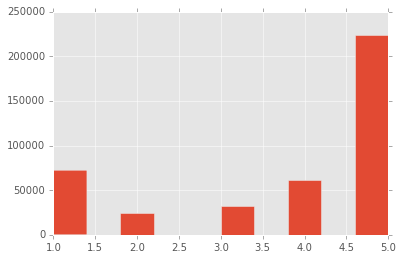

In [29]:
ts_rating.hist()

In [75]:
pivot_prominent = pd.pivot_table(data, values=['Rating', 'Review_votes'], index=['Brand_name'], columns=[], 
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], margins = True, 
                                 fill_value = 0).sort_values(by = ('count_nonzero', 'Rating'), ascending = False).fillna('')

In [79]:
pivot_prominent
pivot_prominent_reindexed = pivot_prominent.reindex()

In [160]:
pivot_prominent_reindexed = pivot_prominent

In [161]:
pivot_prominent_reindexed.head(11)# we see the total value count is in fact the total observations 413840.

sum                   mean              count_nonzero  \
             Rating Review_votes    Rating Review_votes        Rating   
Brand_name                                                              
All         1580694       605222  3.819578     1.507237        413840   
Samsung      260513        97903  3.962356     1.530069         65747   
BLU          239853        58430  3.792262     0.952792         63248   
Apple        228346       112280  3.924415     1.998149         58186   
LG            86114        23070  3.841460     1.061178         22417   
BlackBerry    63126        21114  3.741465     1.279326         16872   
Nokia         64187        25964  3.819291     1.600148         16806   
Motorola      51157        23107  3.812849     1.777051         13417   
HTC           44094        12803  3.465420     1.035506         12724   
CNPGD         39176        20151  3.106002     1.638026         12613   
OtterBox      35022         2276  4.383778     0.288759          7989   

                              std               
           Review_votes    Rating Review_votes  
Brand_name                                      
All              135397  1.548214     9.163842  
Samsung           20363  1.485313     9.914559  
BLU               17908  1.502263     5.522102  
Apple             20382  1.576060    13.234629  
LG                 6589  1.534323     5.087236  
BlackBerry         4426  1.599935     7.724535  
Nokia              6110  1.490946     7.876848  
Motorola           4806  1.524914    15.272072  
HTC                3544  1.660243     5.513401  
CNPGD              3813  1.618294     8.964740  
OtterBox            850  1.164561     2.620350

In [162]:
pivot_prominent_reindexed.head(11).index

Index([       u'All',    u'Samsung',        u'BLU',      u'Apple',
               u'LG', u'BlackBerry',      u'Nokia',   u'Motorola',
              u'HTC',      u'CNPGD',   u'OtterBox'],
      dtype='object', name=u'Brand_name')

In [170]:
# pivot_list_index = pivot_prominent_reindexed.head(11).set_index()
# #pivot_list2 = pivot_list['Brand_name']
# #pivot_list3 = pivot_list2.reset_index()
# pivot_brand_list = list(set(pivot_list_index))
# pivot_list_brand.remove('All') 

In [169]:
#pivot_list_index['Brand_name']

In [119]:
index_list = list(set(pivot_prominent.index))
#pivot_prominent_reindexed['Brand_name']
# pivot_top_list = list(set(pivot_top['Brand_name']))
# pivot_top_list.remove('All')

In [171]:
data.head()

,Product_name,Brand_name,Price,Rating,Reviews,Review_votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0


In [30]:
X = data.Reviews
y = data.Rating

In [31]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

/Users/nadhir/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
print 'X_train', X_train.shape
print 'X_test', X_test.shape
print 'y_train', y_train.shape
print 'y_test', y_test.shape

X_train (310380,)
X_test (103460,)
y_train (310380,)
y_test (103460,)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [256]:
# vectorizer = CountVectorizer(max_features = 500, stop_words='english')
# vectorizer.fit_transform(data.Reviews.values.astype('U'))
# X_train_dtm = vect.fit_transform(X_train)
# X_test_dtm = vect.transform(X_test)#do not transform(document text matrix: numerical values)
#X_test_dtm.shape, X_train_dtm.shape

In [34]:
text = data.Reviews[0:5]
vectorizer = CountVectorizer(max_features = 500, stop_words='english')
term_doc = vectorizer.fit_transform(text.values.astype('U'))
word_liste = vectorizer.get_feature_names()

In [35]:
#term_doc.toarray() 
word_liste[0:7]

[u'adjust', u'android', u'apart', u'appreciate', u'button', u'clean', u'didn']

In [36]:
company_brand = data[data.Brand_name=='Apple']

In [37]:
df_one_company_Rating = company_brand.Rating

In [38]:
from sklearn.feature_selection import SelectKBest

In [39]:
def corr_matrix_of_important_words(term_doc, word_liste, scores, n_features_to_keep):
    selector = SelectKBest(k=n_features_to_keep).fit(term_doc, scores)
    informative_words_index = selector.get_support(indices=True)
    labels = [word_liste[i] for i in informative_words_index]
    data = pd.DataFrame(term_doc[:,informative_words_index].todense(), columns=labels)
    data['Score'] = df_one_company_Rating
    return(data.corr())


In [41]:
corr_matrix_of_important_words(term_doc, word_liste, df_one_company_Rating, 15)

ValueError: Found input variables with inconsistent numbers of samples: [5, 58186]

In [301]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# model1 = linear_model.LinearRegression()
# model2 = LogisticRegression()
# model3 = MultinomialNB(alpha=0.001)
# model1_fit = model1.fit(X_test, y_test)
# model2_fit = model1.fit(X_test, y_test)
# model3_fit = model1.fit(X_test, y_test)

# # check the accuracy on the training set
# model1.score(X_test, y_test)
# model2.score(X_test, y_test)
# model3.score(X_test, y_test)

In [210]:
# >>> 'abc'.decode('utf-8')  # str to unicode
# u'abc'
# >>> u'abc'.encode('utf-8') # unicode to str
# 'abc' 

u'X_train[0]'

In [232]:
u'data.Reviews'.decode('utf-8')

u'data.Reviews'

In [233]:
type(data.Reviews[0])

unicode

In [302]:
# [x.encode('UTF8') for x in data.Reviews]

In [ ]:
def trouver_float():
    for idx, rev in enumerate(data.Reviews):
        if(type(rev)==float):
            print(idx, rev)
    p = print('fin')
    return p
        

In [47]:
pivot = pd.pivot_table(df,
            values = ['Rating', 'Review_votes'],
            index =  ['Brand_name'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
top_10_brands = pivot.reindex().head(n=11)
top_10_brands

sum                   mean              count_nonzero  \
             Rating Review_votes    Rating Review_votes        Rating   
Brand_name                                                              
All         1580694       605222  3.819578     1.462454        413840   
Samsung      260513        97903  3.962356     1.489087         65747   
BLU          239853        58430  3.792262     0.923824         63248   
Apple        228346       112280  3.924415     1.929674         58186   
LG            86114        23070  3.841460     1.029130         22417   
BlackBerry    63126        21114  3.741465     1.251422         16872   
Nokia         64187        25964  3.819291     1.544924         16806   
Motorola      51157        23107  3.812849     1.722218         13417   
HTC           44094        12803  3.465420     1.006209         12724   
CNPGD         39176        20151  3.106002     1.597637         12613   
OtterBox      35022         2276  4.383778     0.284892          7989   

                              std               
           Review_votes    Rating Review_votes  
Brand_name                                      
All              123101  1.548214     9.030304  
Samsung           18602  1.485313     9.783997  
BLU               15985  1.502263     5.439966  
Apple             18388  1.576060    13.010956  
LG                 5912  1.534323     5.013116  
BlackBerry         4058  1.599935     7.642110  
Nokia              5530  1.490946     7.745235  
Motorola           4392  1.524914    15.037728  
HTC                3184  1.660243     5.437551  
CNPGD              3502  1.618294     8.857163  
OtterBox            743  1.164561     2.602952

In [55]:
#top_10_brands = top_10_brands.reset_index()
tt_brand = top_10_brands['Brand_name']
tt_brand2 = tt_brand.reset_index()
top_10_brand_list = list(set(tt_brand2['Brand_name']))
top_10_brand_list.remove('All')

In [57]:
top_10_brand_list

[u'LG',
 u'Motorola',
 u'HTC',
 u'Apple',
 u'Samsung',
 u'BLU',
 u'Nokia',
 u'OtterBox',
 u'BlackBerry',
 u'CNPGD']

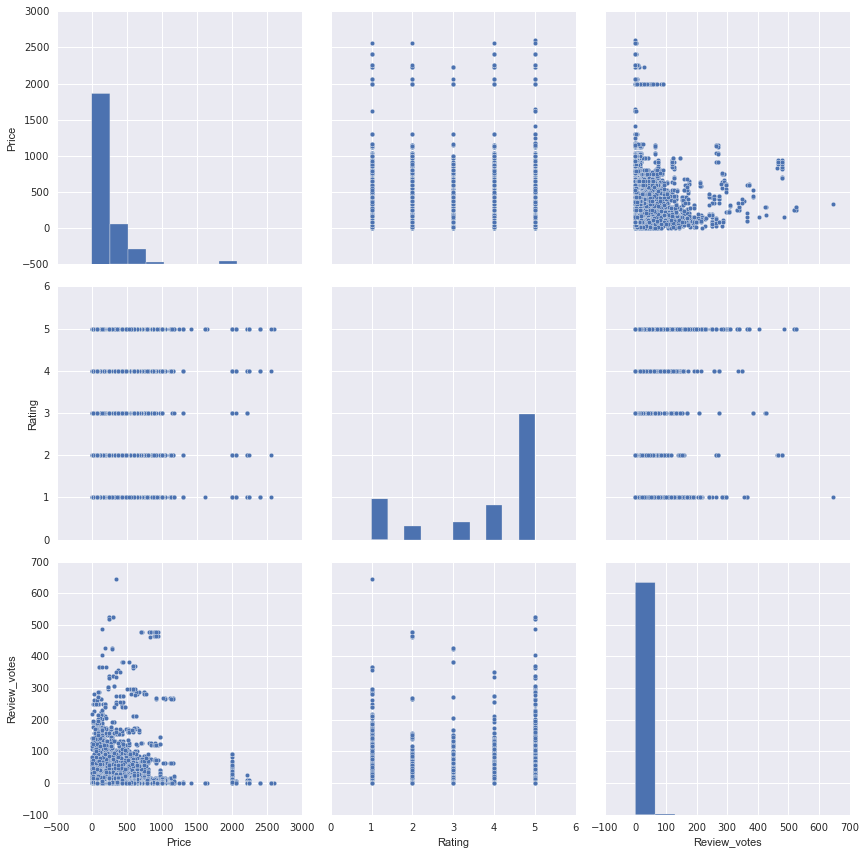

In [61]:
import seaborn as sns
df_small = df[['Brand_name', 
               'Price', 
               'Rating', 
               'Review_votes']]
sns.pairplot(df_small, size=4)

LG
Motorola
HTC
Apple
Samsung
BLU
Nokia
OtterBox
BlackBerry
CNPGD


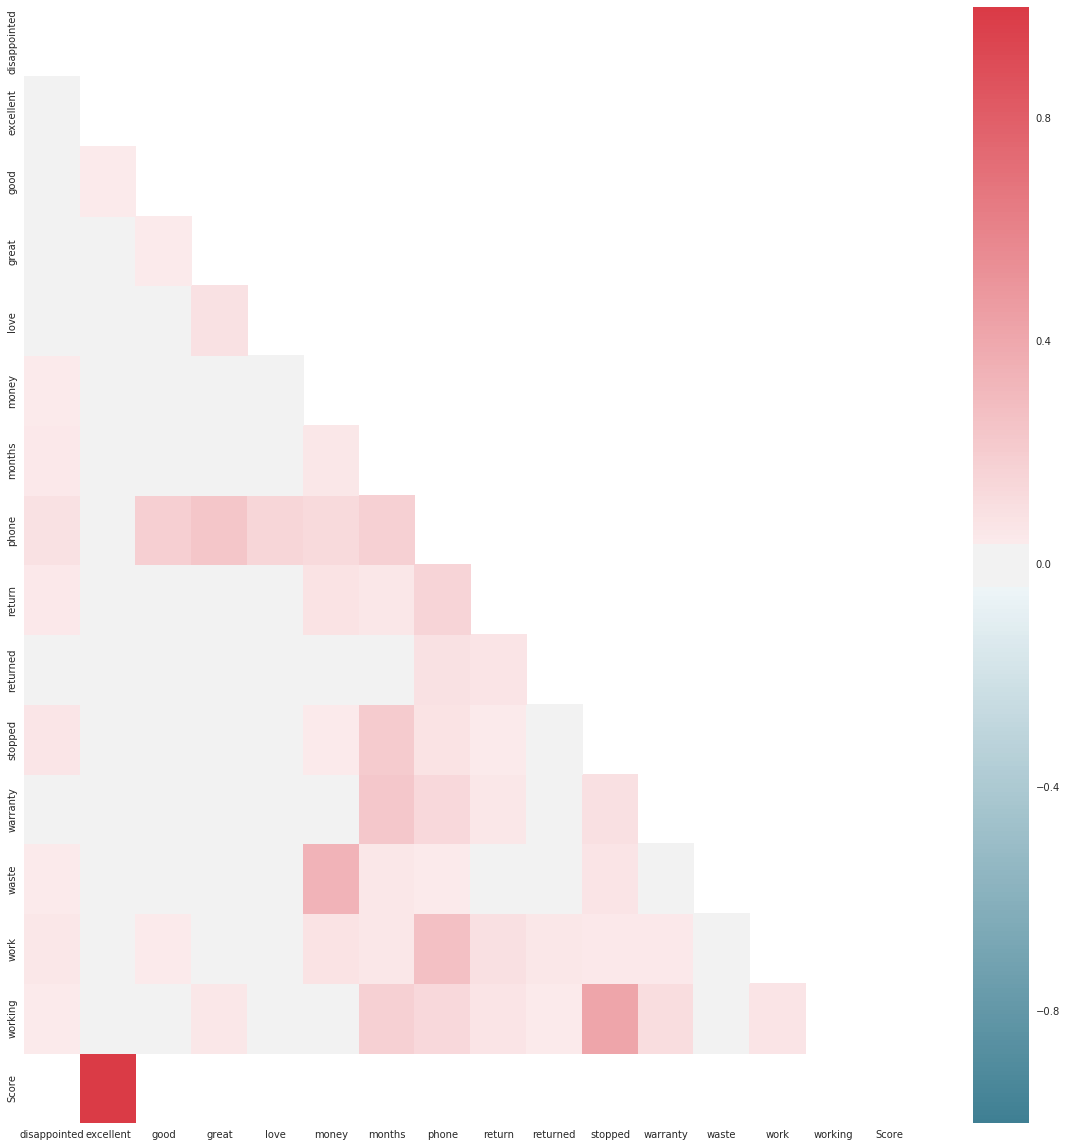

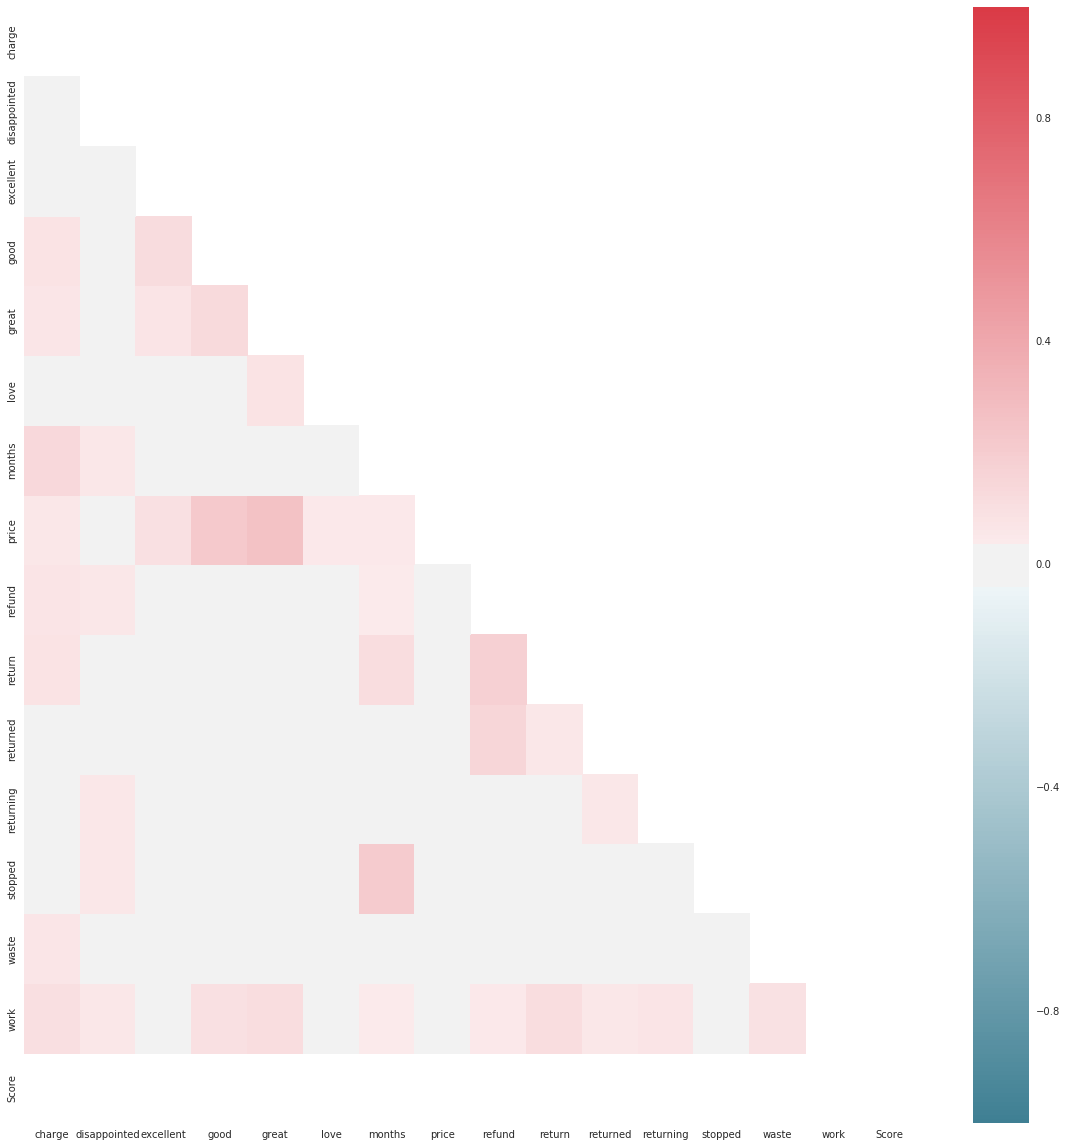

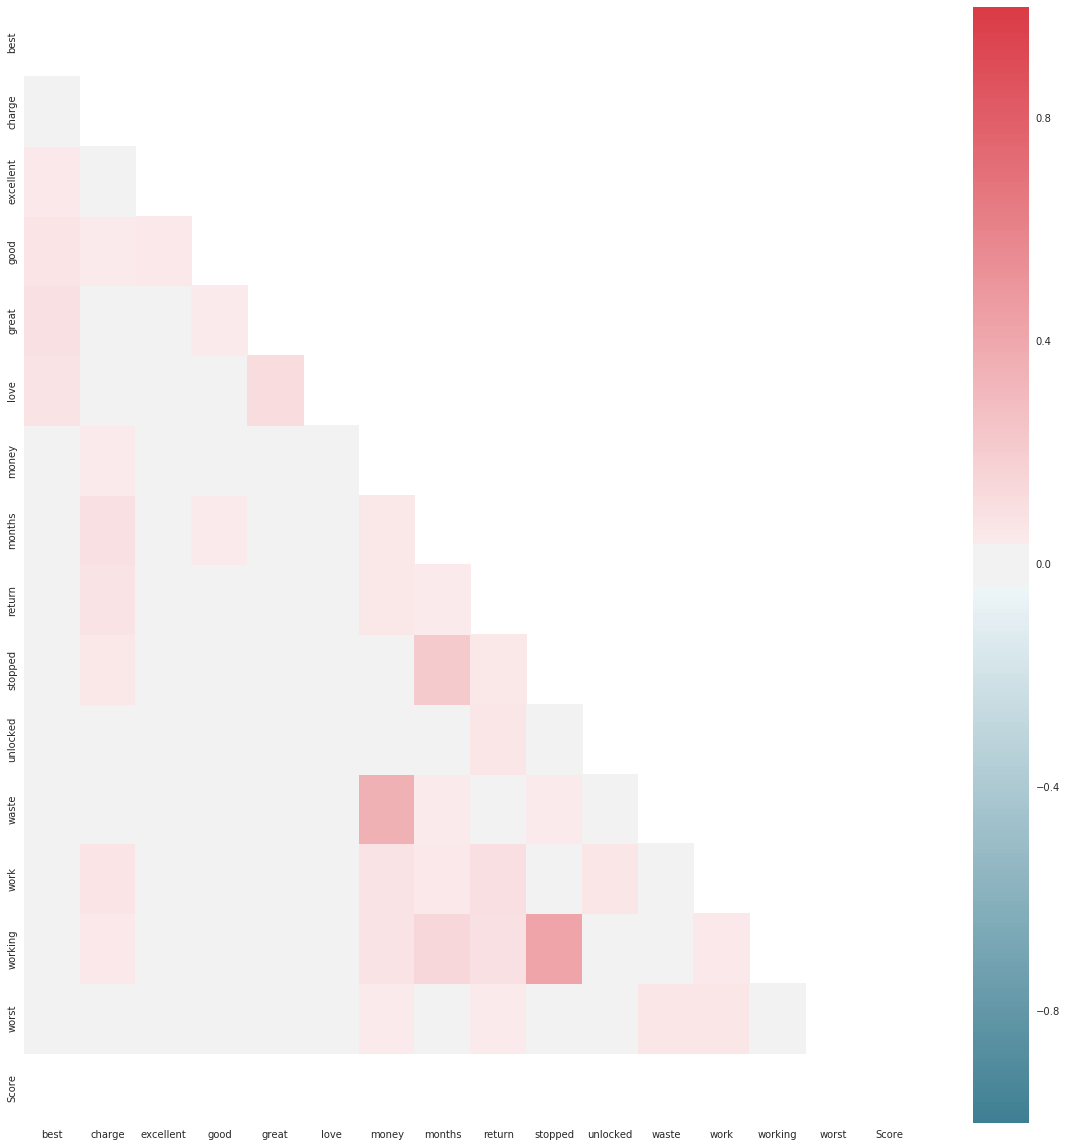

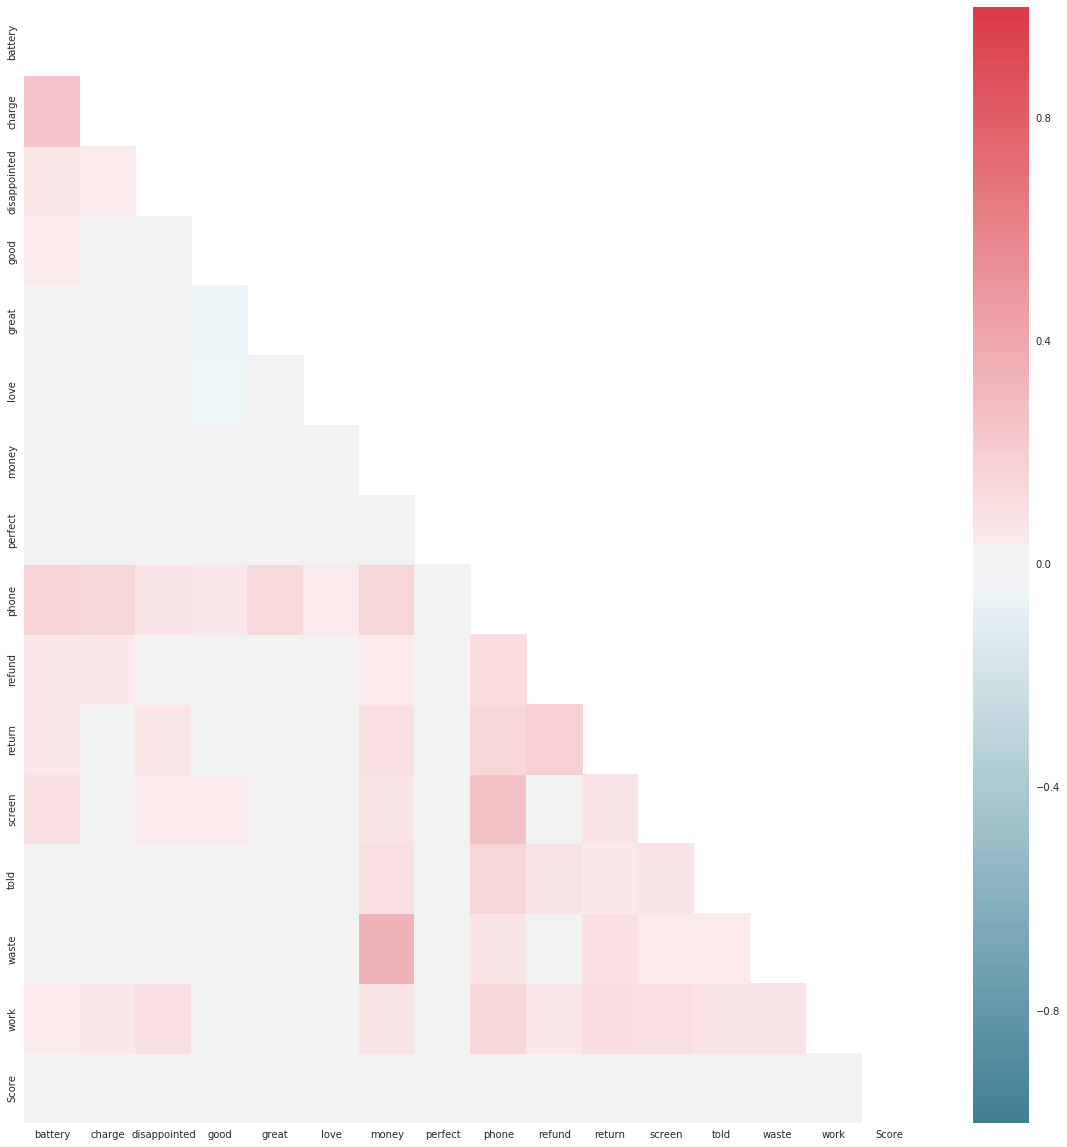

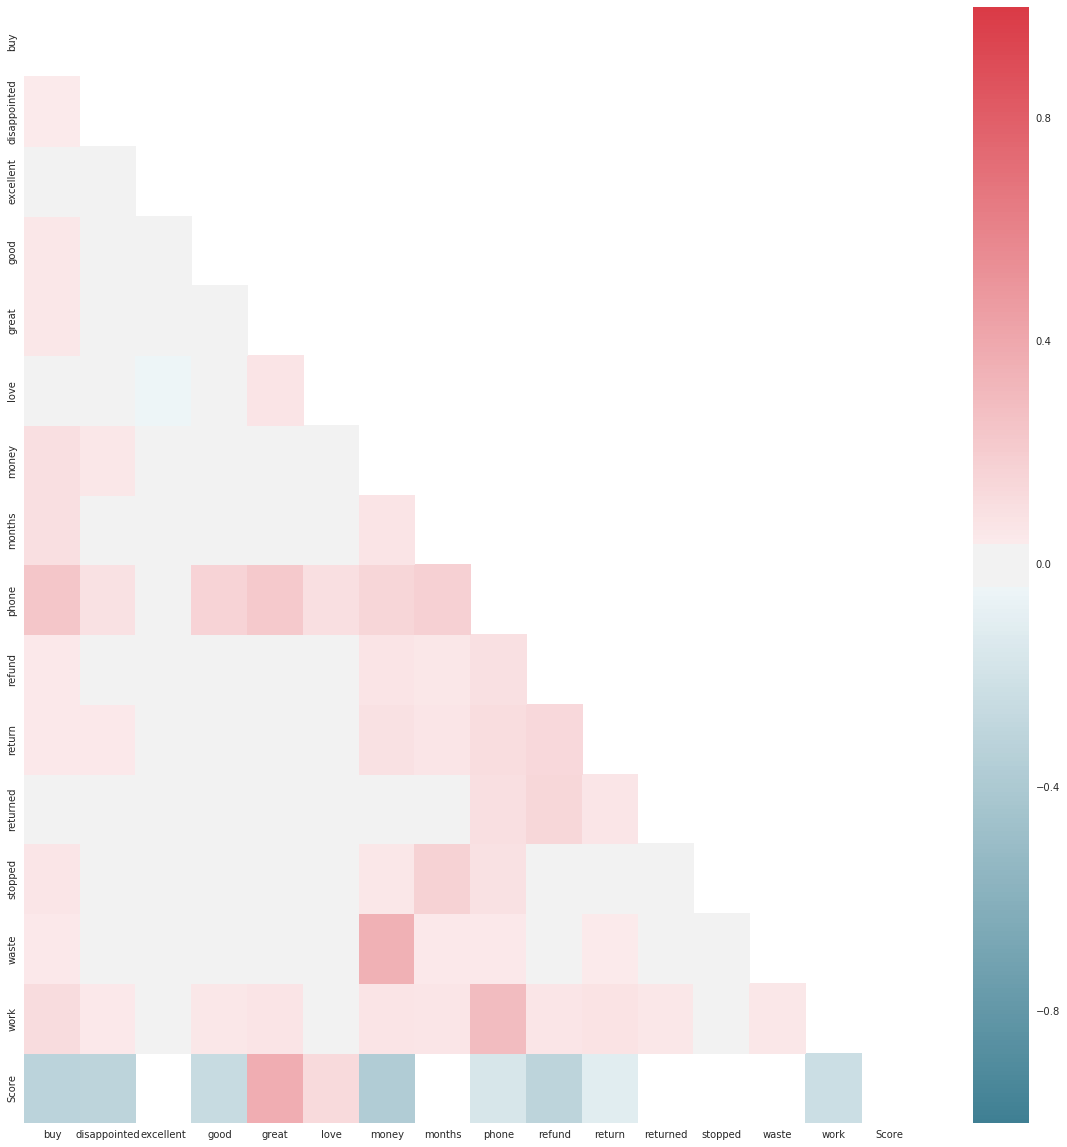

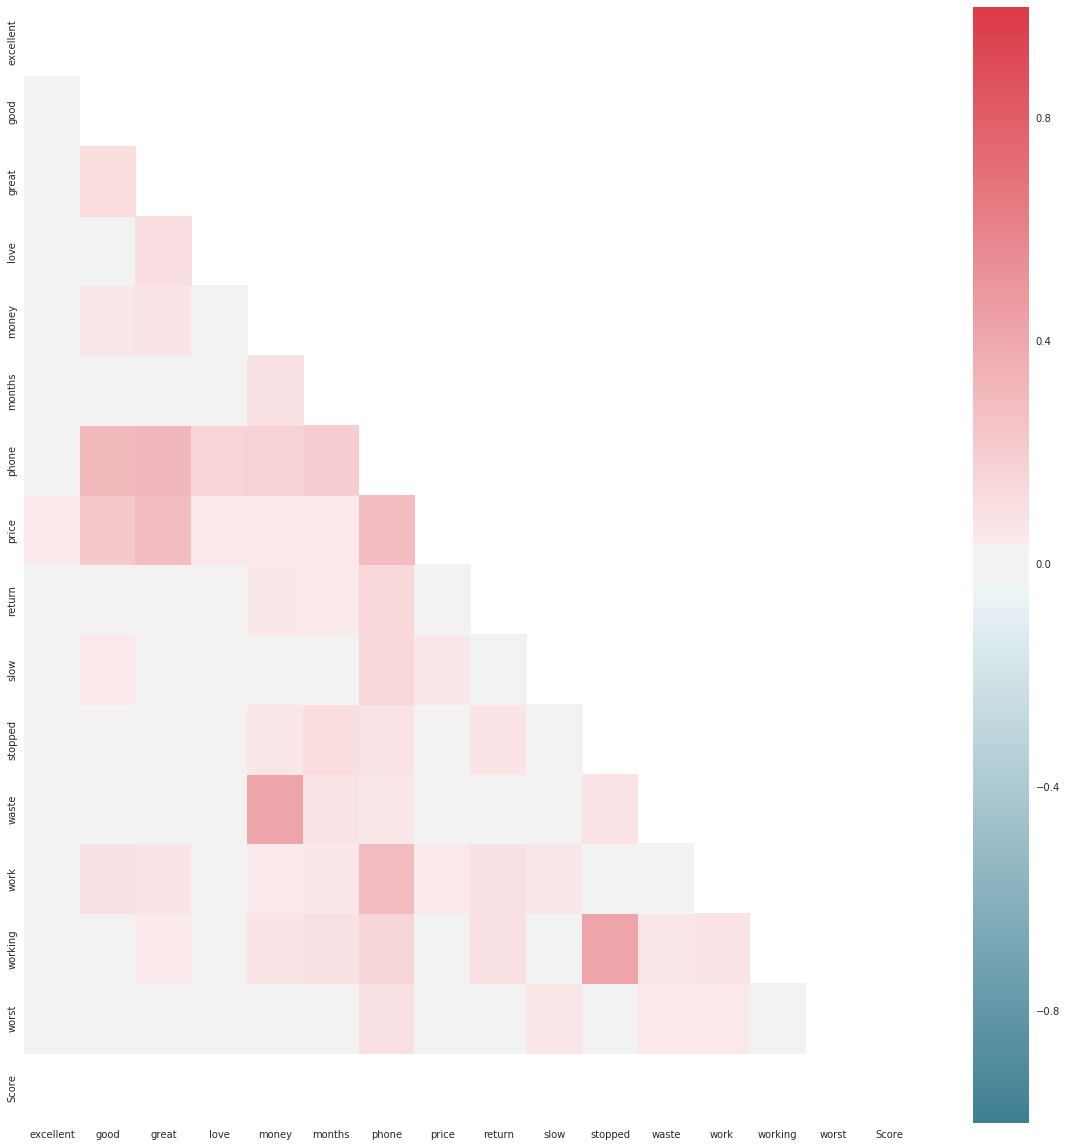

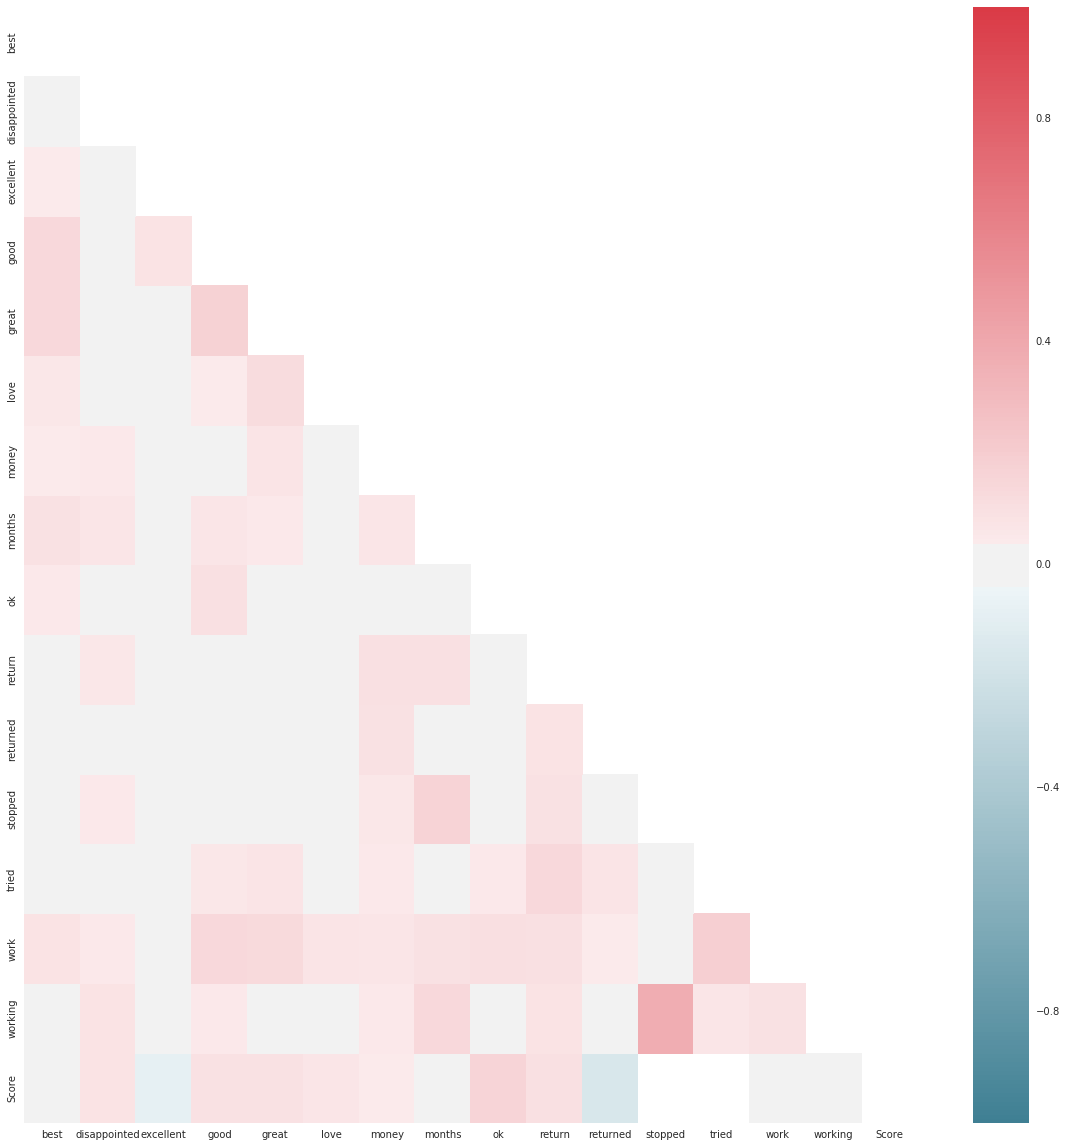

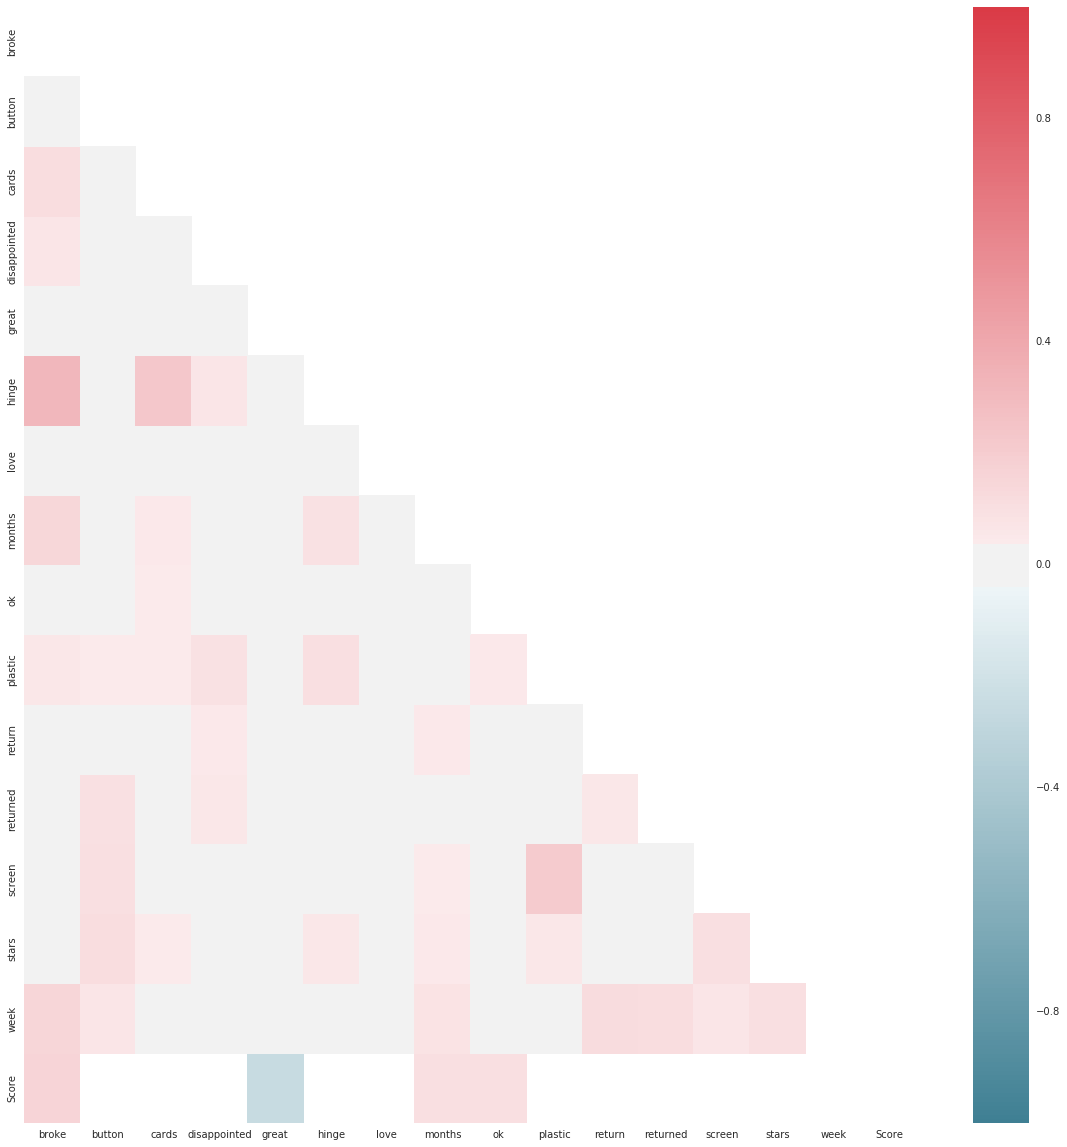

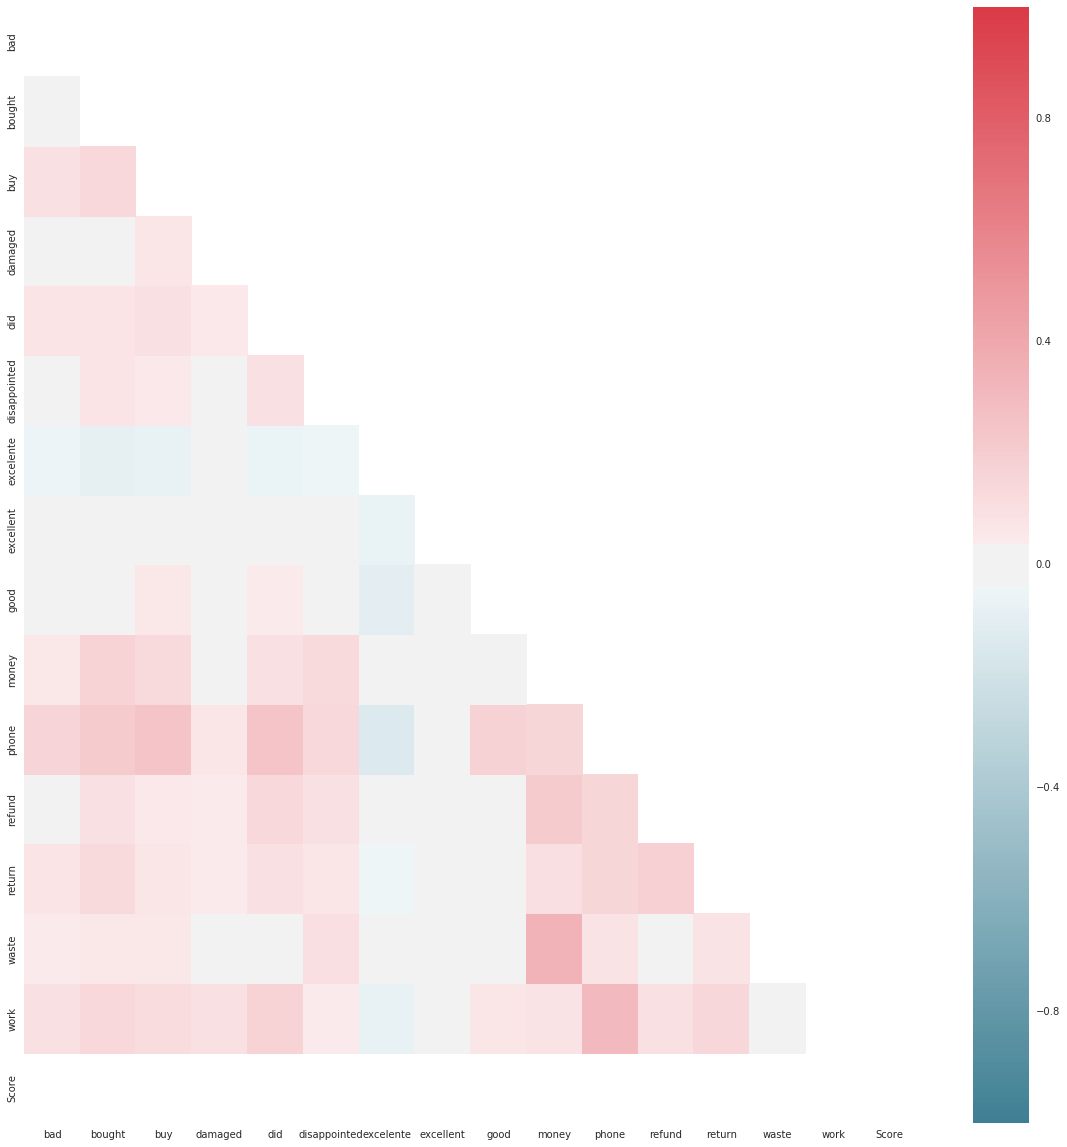

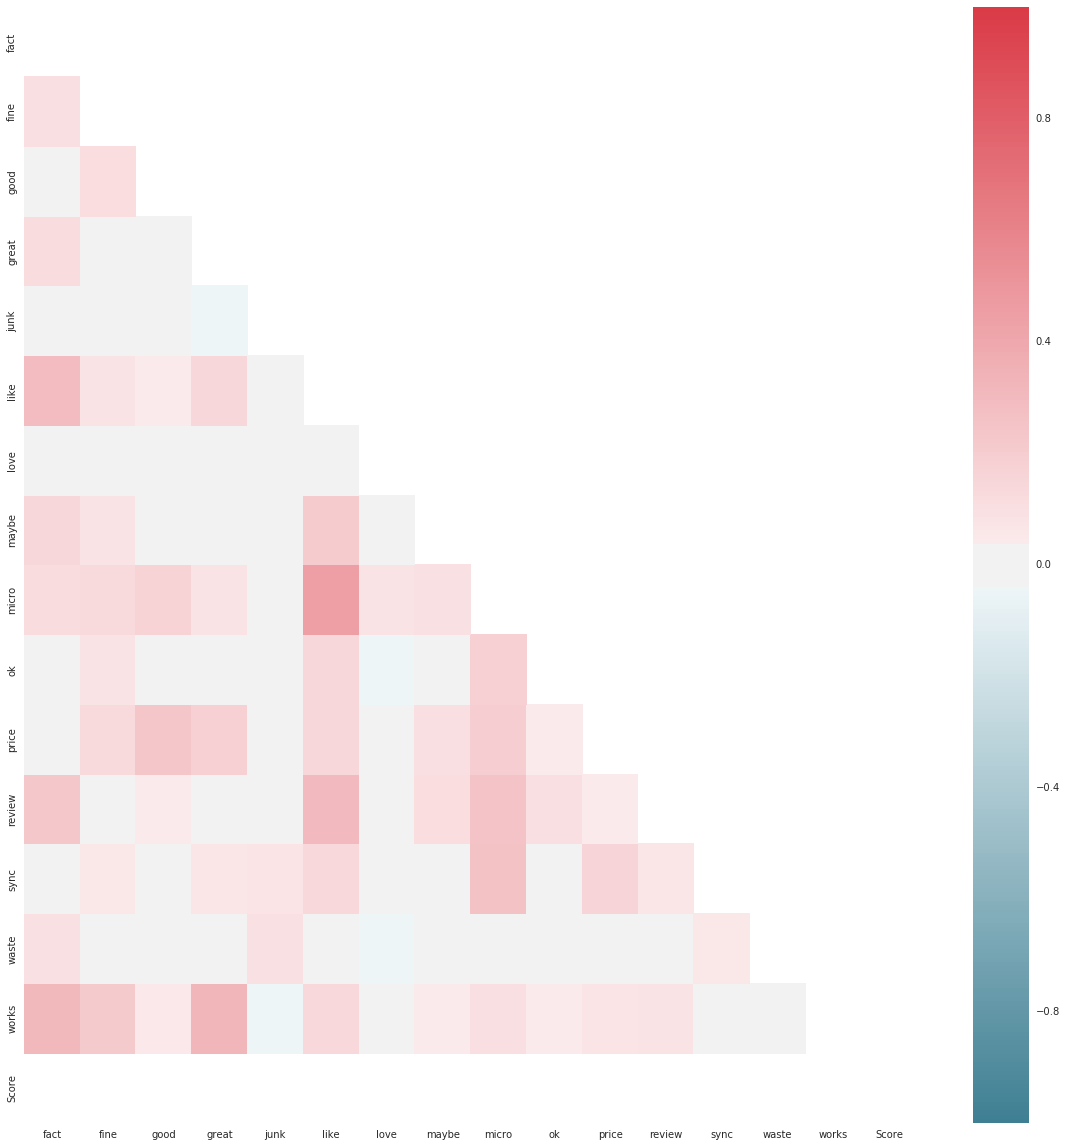

In [62]:
def find_correlations_one_brand(company):
    df_one_company = df.loc[data['Brand_name'].isin([company])]
    def corr_matrix_of_important_words(term_doc_mat, word_list, scores, n_features_to_keep):
        selector = SelectKBest(k=n_features_to_keep).fit(term_doc_mat, scores)
        informative_words_index = selector.get_support(indices=True)
        labels = [word_list[i] for i in informative_words_index]
        data = pd.DataFrame(term_doc_mat[:,informative_words_index].todense(), columns=labels)
        data['Score'] = df_one_company.Rating
        return(data.corr())

    def heat_map(corrs_mat):
        sns.set(style="white")
        f, ax = plt.subplots(figsize=(20, 20))
        mask = np.zeros_like(corrs_mat, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True 
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)
    vectorizer = CountVectorizer(max_features = 500, stop_words='english')
    term_doc_mat = vectorizer.fit_transform(df_one_company.Reviews.values.astype('U'))
    word_list = vectorizer.get_feature_names()

    corrs_large = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 60)
    #print(corrs_large.Score.sort_values(inplace=False)[:-1])
    corrs_small = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 15)
    heat_map(corrs_small)

for item in top_10_brand_list:
    print (item)
    find_correlations_one_brand(item)

# USING NLTK for text processing

In [70]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

# from keras.preprocessing import sequence
# from keras.utils import np_utils
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation, Lambda
# from keras.layers.embeddings import Embedding
# from keras.layers.recurrent import LSTM, SimpleRNN, GRU
# from keras.preprocessing.text import Tokenizer
# from collections import defaultdict
# from keras.layers.convolutional import Convolution1D
# from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')

In [63]:
def review_to_wordlist( review, remove_stopwords=True):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()

    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))

    # 5. Return a list of words
    return(b)

In [80]:
#df_nltk = data
n = 413000  
s = 20000 
skip = sorted(random.sample(range(1,n),n-s))


datanl = pd.read_csv('Amazon_Unlocked_Mobile.csv', delimiter = ",", skiprows = skip)# we take a sample

In [82]:
datanl.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,excelente,0
2,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,phone works great for the price although when ...,1
3,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,4,Nice phone. Easy to read screen. I am a senior...,6
4,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,This phone was purchased for my father. I real...,15


In [78]:
for i in range(5):
    p = sorted(random.sample(range(1,5),2))
    print p

[2, 4]
[2, 3]
[3, 4]
[2, 3]
[1, 4]


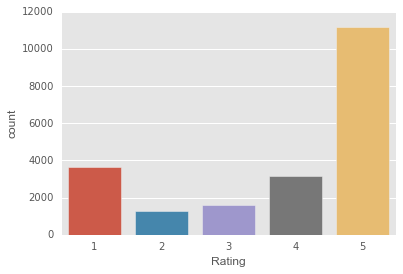

In [87]:
sns.countplot(datanl['Rating'])

In [91]:
datanl = datanl[datanl['Reviews'].isnull()==False]
train, test = train_test_split(datanl, test_size = 0.3)

In [92]:
clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))


/Users/nadhir/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/nadhir/anaconda/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "https://www.amazon.com/gp/product/B00U8KSNB0/ref=cm_cr_ryp_prd_ttl_sol_22" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that docu

In [93]:
clean_train_reviews[0:10]

[u'satisfi purchas phone run fair smooth face problem use',
 u'want like phone hit lot sweet spot like price size batteri life camera qualiti utter fail one smartphon essenti task locat servic gps lock tenuous best result turn turn direct useless go back moto e gps champ',
 u'got son aprox yrs ago still go strong love',
 u'ok time shipment phone stop work month daili use',
 u'nice phone configur email state',
 u'phone came everyth work perfect consid use caribbean issu get faulti earphon',
 u'love phone move found extra well worth sure like slight bigger screen still fit pocket though bit tighter yet see advantag iphon samsung phone much user friend capabl',
 u'say realli happi spent littl bit usual get phone potenti buyer note phone take micro sim card mine regular size run provid buy smaller one week usag phone enter dinosaur mode one instal app still run like champ handl pokemon go best batteri last long mayb like hour actual use still last whole day whole time huge amount disk spac

In [94]:
clean_test_reviews[0:10]

[u'dollar good ask good big brand useabl nonetheless charg circuit stop work month terribl product',
 u'nice',
 u'even month own phone stop work well screen get text call respond pleas',
 u'read review amazon purchas knew get receiv phone origin packag immediat took tri get thing figur well tech savi person spend ish minut head local tmobil store walk everyth yes phone delet number make sure save sim card press button retriev happen month abl get phone make notifi new text sound phone take littl get accustom worth price look',
 u'excel product',
 u'buy bought use tmobil sim card grandmoth said unlock would work insert carrier sim card wast money',
 u'super comfiabl',
 u'receiv phone time abl track phone month great size great easi hold bad thing batteri life',
 u'use need power smarphon smallest size cours sacrific screen legibl occupi littl space pocket',
 u'love look feel phone well phenomin batteri life ship fast']

# USE TDIF

In [95]:
vectorizer_tdif = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer_tdif = vectorizer.fit(clean_train_reviews)
train_features = vectorizer_tdif.transform(clean_train_reviews)

test_features = vectorizer_tdif.transform(clean_test_reviews)

# Select Features

In [105]:
fselect = SelectKBest(chi2 , k='all')
train_features = fselect.fit_transform(train_features, train['Rating'])
test_features = fselect.transform(test_features)

In [110]:
model1 = MultinomialNB(alpha=0.001)
model1.fit( train_features, train["Rating"] )

model2 = SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)
model2.fit( train_features, train["Rating"] )

model3 = RandomForestClassifier()
model3.fit( train_features, train["Rating"] )

model4 = GradientBoostingClassifier()
model4.fit( train_features, train["Rating"] )

pred_1 = model1.predict( test_features.toarray() )
pred_2 = model2.predict( test_features.toarray() )
pred_3 = model3.predict( test_features.toarray() )
pred_4 = model4.predict( test_features.toarray() )

# Error visualization (Random Forest Model)

In [122]:
from sklearn import metrics
print classification_report(test['Rating'], pred_2, target_names=['1','2','3','4','5'])

             precision    recall  f1-score   support

          1       0.53      0.64      0.58      1072
          2       0.16      0.06      0.08       378
          3       0.24      0.07      0.11       490
          4       0.28      0.11      0.16       933
          5       0.71      0.90      0.79      3382

avg / total       0.54      0.62      0.57      6255



In [125]:
class NBSVM(six.with_metaclass(ABCMeta, BaseEstimator, ClassifierMixin)):

    def __init__(self, alpha=1.0, C=1.0, max_iter=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.C = C
        self.svm_ = [] # fuggly

    def fit(self, X, y):
        X, y = check_X_y(X, y, 'csr')
        _, n_features = X.shape

        labelbin = LabelBinarizer()
        Y = labelbin.fit_transform(y)
        self.classes_ = labelbin.classes_
        if Y.shape[1] == 1:
            Y = np.concatenate((1 - Y, Y), axis=1)

        # LabelBinarizer().fit_transform() returns arrays with dtype=np.int64.
        # so we don't have to cast X to floating point
        Y = Y.astype(np.float64)

        # Count raw events from data
        n_effective_classes = Y.shape[1]
        self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
        self.ratios_ = np.full((n_effective_classes, n_features), self.alpha,
                                 dtype=np.float64)
        self._compute_ratios(X, Y)

        # flugglyness
        for i in range(n_effective_classes):
            X_i = X.multiply(self.ratios_[i])
            svm = LinearSVC(C=self.C, max_iter=self.max_iter)
            Y_i = Y[:,i]
            svm.fit(X_i, Y_i)
            self.svm_.append(svm) 

        return self

    def predict(self, X):
        n_effective_classes = self.class_count_.shape[0]
        n_examples = X.shape[0]

        D = np.zeros((n_effective_classes, n_examples))

        for i in range(n_effective_classes):
            X_i = X.multiply(self.ratios_[i])
            D[i] = self.svm_[i].decision_function(X_i)
        
        return self.classes_[np.argmax(D, axis=0)]
        
    def _compute_ratios(self, X, Y):
        """Count feature occurrences and compute ratios."""
        if np.any((X.data if issparse(X) else X) < 0):
            raise ValueError("Input X must be non-negative")

        self.ratios_ += safe_sparse_dot(Y.T, X)  # ratio + feature_occurrance_c
        normalize(self.ratios_, norm='l1', axis=1, copy=False)
        row_calc = lambda r: np.log(np.divide(r, (1 - r)))
        self.ratios_ = np.apply_along_axis(row_calc, axis=1, arr=self.ratios_)
        check_array(self.ratios_)
        self.ratios_ = sparse.csr_matrix(self.ratios_)

        #p_c /= np.linalg.norm(p_c, ord=1)
        #ratios[c] = np.log(p_c / (1 - p_c))


def f1_class(pred, truth, class_val):
    n = len(truth)

    truth_class = 0
    pred_class = 0
    tp = 0

    for ii in range(0, n):
        if truth[ii] == class_val:
            truth_class += 1
            if truth[ii] == pred[ii]:
                tp += 1
                pred_class += 1
                continue;
        if pred[ii] == class_val:
            pred_class += 1

    precision = tp / float(pred_class)
    recall = tp / float(truth_class)

    return (2.0 * precision * recall) / (precision + recall)


def semeval_senti_f1(pred, truth, pos=2, neg=0): 

    f1_pos = f1_class(pred, truth, pos)
    f1_neg = f1_class(pred, truth, neg)

    return (f1_pos + f1_neg) / 2.0;


def main(train_file, test_file, ngram=(1, 3)):
    print('loading...')
    train = pd.read_csv(train_file, delimiter='\t', encoding='utf-8', header=0,
                        names=['text', 'label'])

    # to shuffle:
    #train.iloc[np.random.permutation(len(df))]

    test = pd.read_csv(test_file, delimiter='\t', encoding='utf-8', header=0,
                        names=['text', 'label'])

    print('vectorizing...')
    vect = CountVectorizer()
    classifier = NBSVM()

    # create pipeline
    clf = Pipeline([('vect', vect), ('nbsvm', classifier)])
    params = {
        'vect__token_pattern': r"\S+",
        'vect__ngram_range': ngram, 
        'vect__binary': True
    }
    clf.set_params(**params)

    #X_train = vect.fit_transform(train['text'])
    #X_test = vect.transform(test['text'])

    print('fitting...')
    clf.fit(train['text'], train['label'])

    print('classifying...')
    pred = clf.predict(test['text'])
   
    print('testing...')
    acc = accuracy_score(test['label'], pred)
    f1 = semeval_senti_f1(pred, test['label'])
    print('NBSVM: acc=%f, f1=%f' % (acc, f1))

In [127]:
model5 = NBSVM(C=0.01)
model5.fit( train_features, train["Rating"] )

pred_5 = model5.predict( test_features )

In [129]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test['Rating'], pred_5)

# Topic Modeling

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 

/Users/nadhir/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [10]:
data_str = pd.read_csv('Amazon_Unlocked_Mobile.csv',encoding='utf8', nrows = 2000)
data_str.dropna()
data_str.columns = ['Product_name', 'Brand_name', 'Price', 'Rating', 'Reviews', 'Review_votes']
#encode_reviews = data.Reviews.values.astype('U') use yor dtm vectorization

In [11]:
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# data_str = pd.read_csv("../input/Shakespeare_data.csv").dropna()
type(data_str['Product_name'][0])


unicode

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import*
senti = SentimentIntensityAnalyzer()

In [13]:
data_str.head()

,Product_name,Brand_name,Price,Rating,Reviews,Review_votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import*
senti = SentimentIntensityAnalyzer()
#%%time
#data_str.Reviews.values.astype('U')
data_str['Senti_Compound_Score'] = data_str.Reviews.apply(lambda x : senti.polarity_scores(x)['compound'])
data_str['Neutral_score'] = data_str.Reviews.apply(lambda x : senti.polarity_scores(x)['neu'])
data_str['Positive_score'] = data_str.Reviews.apply(lambda x : senti.polarity_scores(x)['pos'])
data_str['Negative_score'] = data_str.Reviews.apply(lambda x : senti.polarity_scores(x)['neg'])

data_str.loc[data_str.Senti_Compound_Score >0 ,'Overall_Sentiment']='Positive'
data_str.loc[data_str.Senti_Compound_Score == 0, 'Overall_Sentiment'] = 'Neutral'
data_str.loc[data_str.Senti_Compound_Score < 0,'Overall_Sentiment'] = 'Negative'

In [45]:
# rating_count = pd.Series(data_str.Rating).value_counts()
# rating_count.plot(kind='barh',label='Rating Count',figsize=(8,9),colormap='plasma')

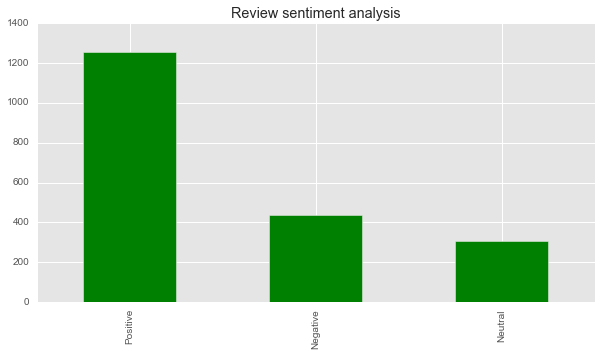

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')

plt.figure(figsize=(10,5)) 
data_str.Overall_Sentiment.value_counts().plot(kind='bar',title="Review sentiment analysis", colormap = 'ocean')

# LDA (Latent Dirichlet Allocation  )

- Latent Dirichlet Allocation represents documents as mixtures of topics that spit out words with certain probabilities. So now suppose you have a set of documents. You’ve chosen some fixed number of K topics to discover, and want to use LDA to learn the topic representation of each document and the words associated to each topic.
- Latent Dirichlet allocation (LDA) is a technique that automatically discovers topics that these documents contain.
- Dirichlet is a distribution specified by a vector parameter α containing some αi corresponding to each topic i, which we write as Dir(α)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import sys

import os

In [18]:
def display_topics(model, feature_names, no_top_words):
    
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:", (topic_idx))
        print(" ".join([feature_names[i]
        for i in topic.argsort()[:-no_top_words - 1:-1]]))


def tfidf_vectorizer(documents,total_features):

    #  TFIDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=total_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    return tfidf_vectorizer,tfidf,tfidf_feature_names

def count_vectorizer(documents,total_features):

    #  Count Vectorizer
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=total_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(documents)
    tf_feature_names = tf_vectorizer.get_feature_names()
    return tf_vectorizer,tf,tf_feature_names

In [19]:
total_features = 15000
num_topic = 10
tfidf_vectorizer, tfidf, tfidf_feature_names = tfidf_vectorizer(data_str.Reviews,total_features)
tf_vectorizer, tf, tf_feature_names = count_vectorizer(data_str.Reviews,total_features)

# Non-negative Matrix Factorization

- LDA is based on probabilistic graphical modeling while NMF relies on linear algebra.
- Both algorithms take as input a bag of words matrix (i.e., each document represented as a row, with each columns containing the count of words in the corpus).
- The aim of each algorithm is then to produce 2 smaller matrices; a document to topic matrix and a word to topic matrix that when multiplied together reproduce the bag of words matrix with the lowest error.

In [20]:
model_lda = LatentDirichletAllocation(n_topics=num_topic, max_iter=30, learning_method='online', 
                                      learning_offset=50.,random_state=0).fit(tfidf)
no_top_words = 8

In [21]:
display_topics(model_lda, tfidf_feature_names, no_top_words)

('Topic:', 0)
wonderful arrival nevera attractive retrieve slide versus embrace
('Topic:', 1)
allow transfer contacts spanish wouldn defected blocked expecting
('Topic:', 2)
gracias yes ecxelente lo older relative needed selected
('Topic:', 3)
excelent bueno muy exelente bad producto buen revision
('Topic:', 4)
met expectations enjoying birthday powering dad loved classy
('Topic:', 5)
phone great good price work love screen nice
('Topic:', 6)
excellent product thanks recommend thank arrived seller condition
('Topic:', 7)
good described okey ver tanks bery satisfy movilnet
('Topic:', 8)
loud volume tells military vocal grandfather glasses garbage
('Topic:', 9)
excelente 100 sucks telefono recomendado liked loved camara


# Intertopic Distance Map (multinomial distribution of term)
- To use the visualization tool, click a circle in the left panel to select a topic, and the bar chart in the right panel will display the 30 most relevant terms for the selected topic, where we define the relevance of a term to a topic, given a weight parameter, 0 ≤ λ ≤ 1, as λ log(p(term | topic)) + (1 - λ) log(p(term | topic)/p(term)). 
- The red bars represent the frequency of a term in a given topic, (proportional to p(term | topic)), and the blue bars represent a term's frequency across the entire corpus, (proportional to p(term)). 
- Change the value of λ to adjust the term rankings -- small values of λ (near 0) highlight potentially rare, but exclusive terms for the selected topic, and large values of λ (near 1) highlight frequent, but not necessarily exclusive, terms for the selected topic. 
- A user study described in our paper suggested that setting λ near 0.6 aids users in topic interpretation, although we expect this to vary across topics and data sets (hence our tool, which allows you to flexiby adjust λ).

In [22]:
data_op = pyLDAvis.sklearn.prepare(model_lda,tfidf,tfidf_vectorizer)
pyLDAvis.enable_notebook()
pyLDAvis.display(data_op)